In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import yfinance as yf

#importing the necessary library

In [2]:
#getting date.

import datetime

now=datetime.datetime.now()

print(f"This Analysis was carried out on {now: %A %d %B, %Y}")

This Analysis was carried out on  Saturday 05 August, 2023


In [3]:
#download BTC-USD data

df=yf.download('BTC-USD',start='2015-01-01',end=now)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


Data Observation:

Numerical data, and date As Index.

<AxesSubplot:xlabel='Date'>

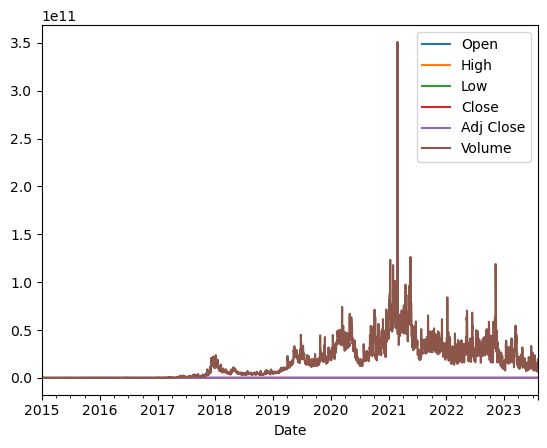

In [4]:
#understanding the trend of the data.

df.plot()

In [5]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
#import sketch to help me with columns info;
import sketch

df.sketch.ask('can you give me friendly names and single sentence descriptions of each column? (format output as HTML List?)')

<AxesSubplot:xlabel='Date'>

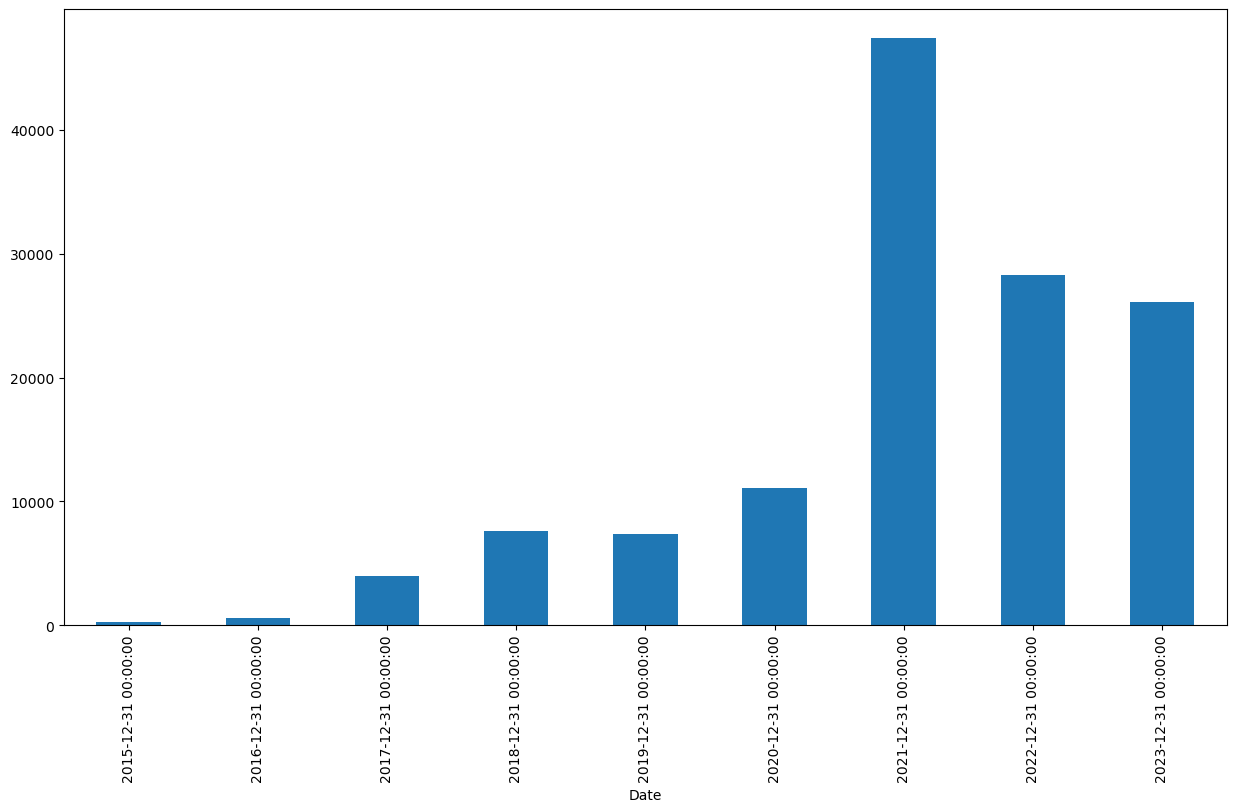

In [7]:
#let plot on total number of Opening trade by year

df.assign(Yearly=df['Open']).resample('Y')['Open'].mean().plot(kind='bar',figsize=(15,8))

>> Year 2021 is the most year We gat more Open Trade.

In [8]:
#let get the total open trade per day

df['Total_trade']=df['Open']*df['Volume']

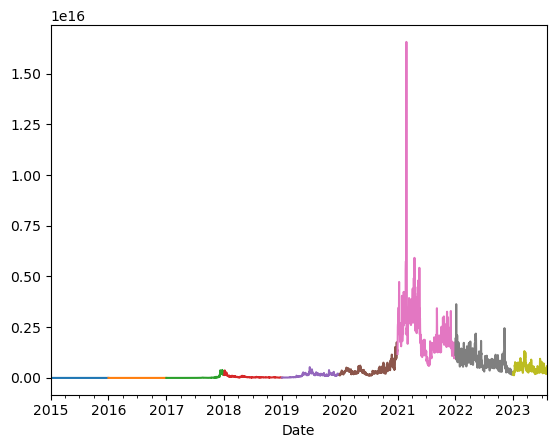

In [9]:
(df.assign(open_trade=df['Total_trade'].mean()).resample('Y')['Total_trade'].plot());

>Year 2021 we gat more opening Trade.

<AxesSubplot:xlabel='Date'>

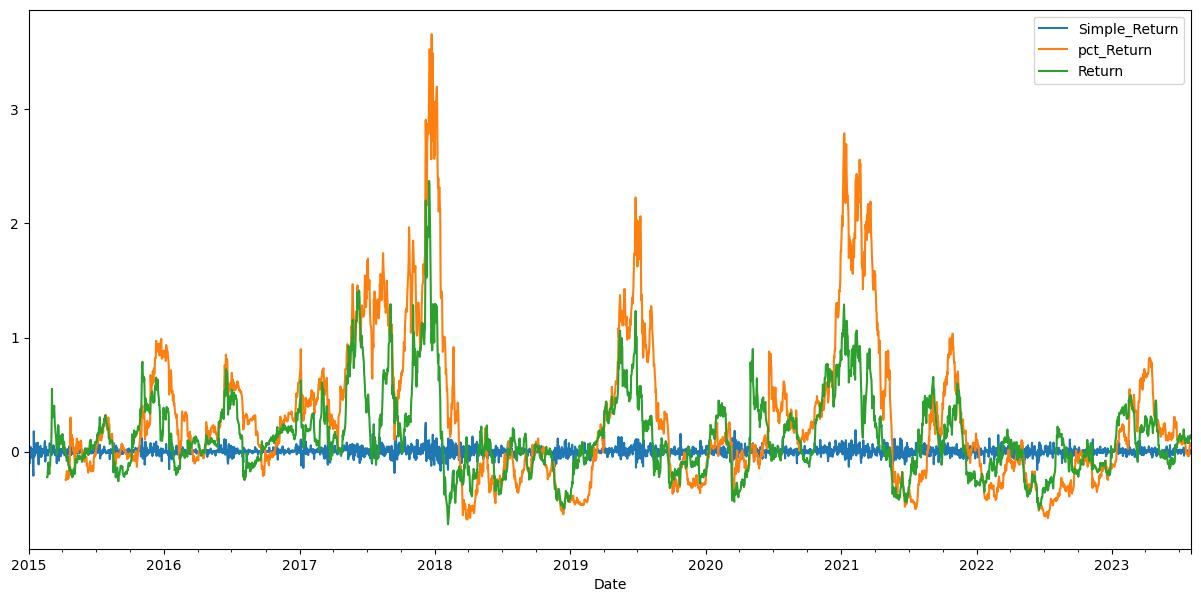

In [10]:
#the adjusted Percentage for day one and also for 100 days, so as to get a Clearer pictures of the Data. 

df['Simple_Return']=df['Adj Close'].pct_change()
df['Return']=df['Adj Close'].pct_change(50)
df['pct_Return']=df['Adj Close'].pct_change(100) 

df.loc[:,['Simple_Return','pct_Return','Return']].plot(figsize=(15,7))

from The lineplot, one can See That The trend line named Simple_return Is More seasonal Trend.

and Secondly, in 2017,2019 & 2021 there is A Big spike up and also in 2018 we also have a spike down. 

what really happning? Let Check 

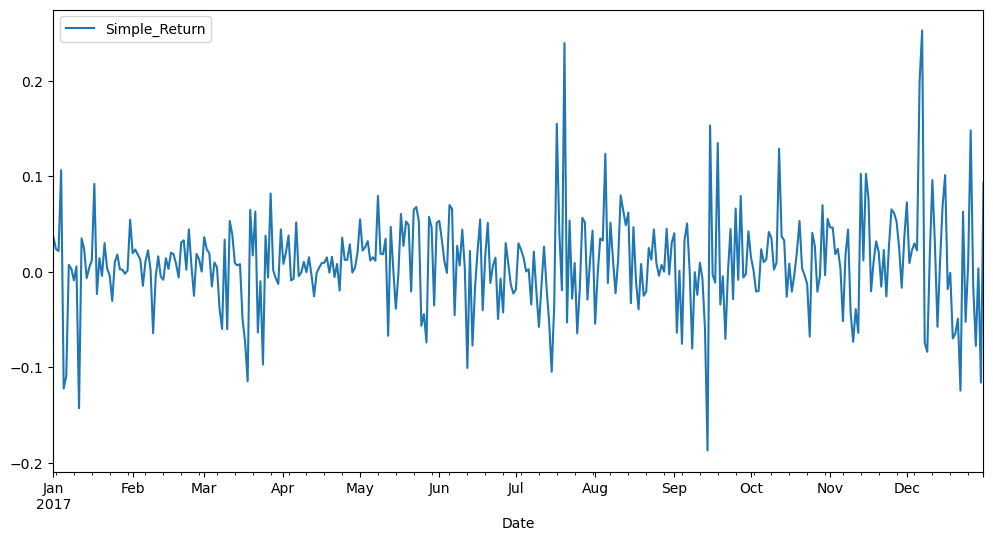

In [11]:
#let check out what could really Happen between 2017, that should be between jan to jun(fiirst half of the Year)


df_2017=df.loc[:,['Simple_Return']]['jan 2017': 'dec 2017'].plot(figsize=(12,6))

>In 2017, the price of Bitcoin (BTC) experienced a significant increase. It started the year at around $1,000 and reached an all-time high of nearly $20,000 in December. This surge in price was driven by increased adoption and interest from institutional investors, as well as growing awareness and acceptance of cryptocurrencies. However, the price also experienced significant volatility throughout the year, with several sharp corrections and fluctuations. Overall, 2017 was a remarkable year for Bitcoin, with its price increasing by over 1,900%.

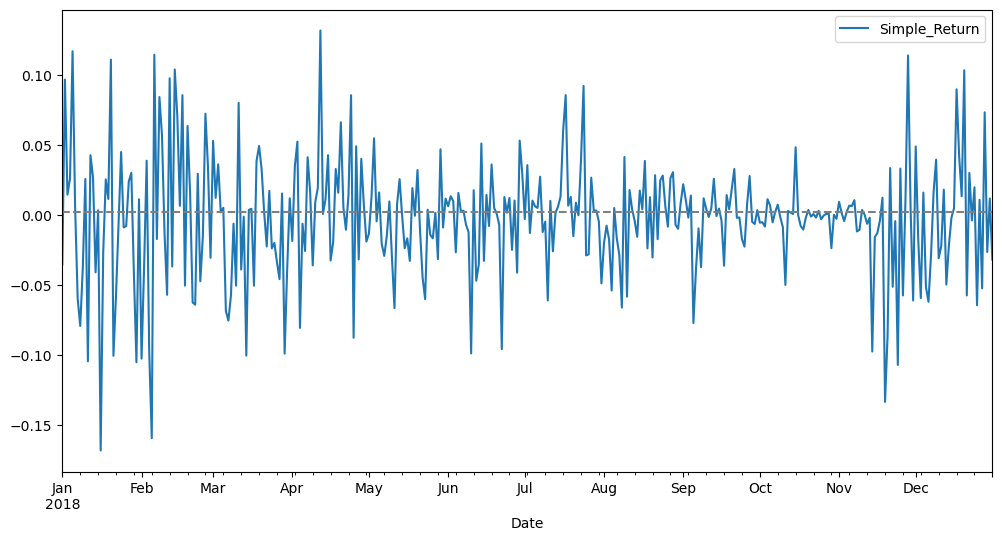

In [12]:
#Year 2018 Event let check what happen?

df.loc[:,['Simple_Return']]['jan 2018': 'dec 2018'].plot(figsize=(12,6))
plt.axhline(df['Simple_Return'].mean(),ls='--',c='grey')

>In 2018, the price of BTC-USD experienced significant volatility. Here is a summary of the major events and price movements:

1. January: The year started with a price of around $14,000, following the previous year's surge. However, the price began to decline rapidly, reaching around $6,000 by early February.

2. February to April: BTC-USD experienced further declines, dropping to around $3,000 in early April. This period was characterized by a general bearish sentiment in the cryptocurrency market.

3. May: The price of BTC-USD started to recover slightly, reaching around $9,000 by the end of the month. This recovery was attributed to positive regulatory developments and increased institutional interest.

4. June to August: The price remained relatively stable during this period, fluctuating between $6,000 and $8,000. Market sentiment was cautious, as investors awaited more regulatory clarity and institutional adoption.

5. September to November: BTC-USD experienced a significant decline, dropping to around $3,000 again. This decline was attributed to various factors, including regulatory crackdowns, market manipulation concerns, and a general market correction.

6. December: Towards the end of the year, BTC-USD witnessed a sharp decline, reaching a low of around $3,200. This decline was accompanied by a broader market sell-off, as investors feared a prolonged bear market.

Overall, 2018 was a challenging year for BTC-USD, with the price experiencing significant volatility and a general downtrend. However, it is important to note that cryptocurrency markets are highly unpredictable, and future price movements can be influenced by various factors.

<AxesSubplot:xlabel='Date'>

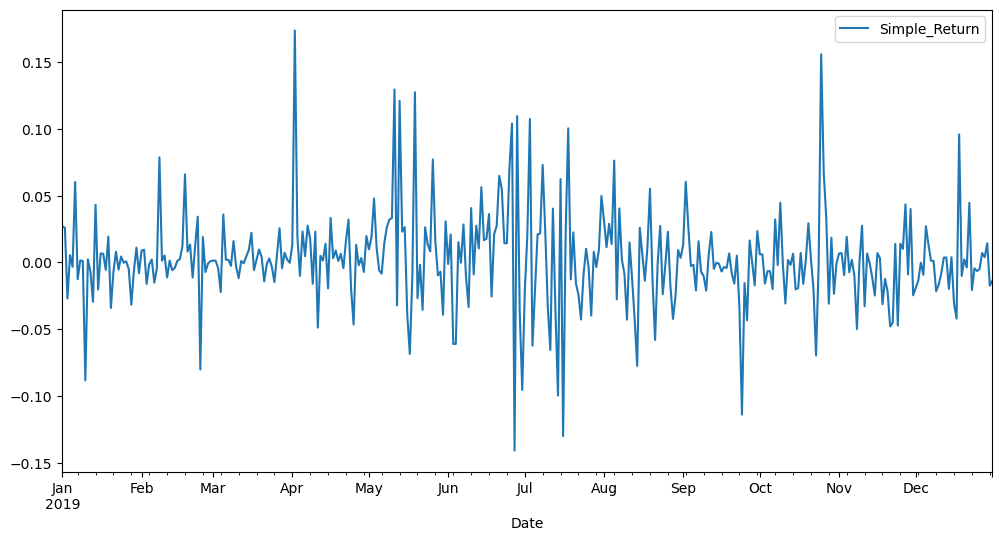

In [13]:
#to be sure,let do for 2018.

df.loc[:,['Simple_Return']]['jan 2019': 'dec 2019'].plot(figsize=(12,6))

>> In 2019, the price of BTC-USD (Bitcoin to USD) experienced significant fluctuations. Here is a summary of the major events and price movements:

- January: Bitcoin started the year at around $3,700 and experienced a gradual increase in price throughout the month, reaching around $3,900 by the end.

- April: The price of Bitcoin surged in April, reaching a 2019 high of around $5,600. This increase was attributed to positive market sentiment and growing institutional interest.

- June: Bitcoin experienced a significant rally, breaking through the $10,000 mark and reaching a peak of around $13,800. This surge was mainly driven by increased mainstream adoption and the anticipation of Facebook's Libra cryptocurrency.

- July-August: After the peak in June, the price of Bitcoin started to decline gradually. It experienced some volatility during this period, fluctuating between $9,000 and $12,000.

- September-October: Bitcoin's price remained relatively stable during these months, ranging between $8,000 and $9,500. Market sentiment was affected by global economic uncertainties and regulatory concerns.

- November-December: Bitcoin witnessed a gradual decline in price, dropping to around $7,000 in November. However, it managed to recover slightly towards the end of the year, closing at around $7,200.

Overall, 2019 saw Bitcoin experiencing both significant highs and lows, with periods of bullish sentiment followed by consolidation and price corrections.

<AxesSubplot:xlabel='Date'>

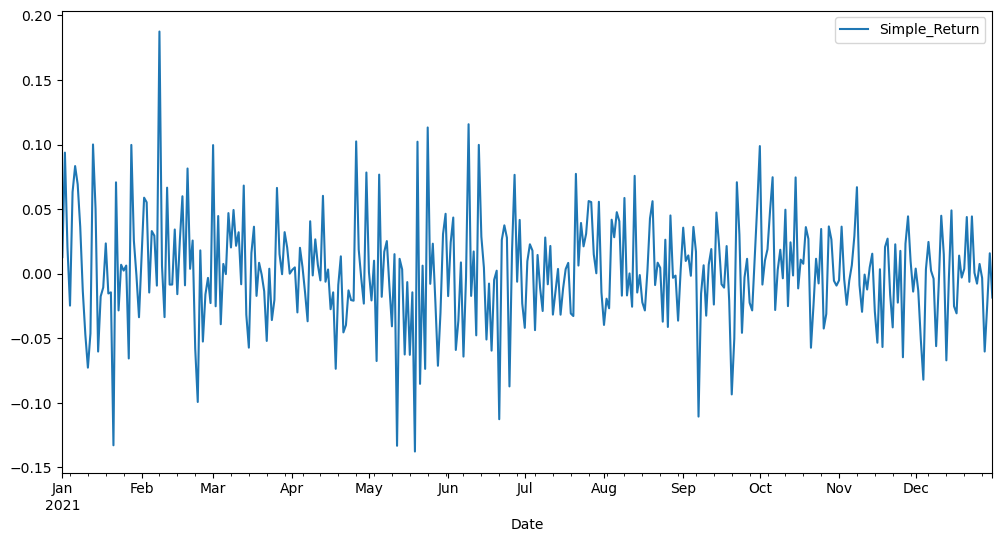

In [14]:
#2021

df.loc[:,['Simple_Return']]['jan 2021': 'dec 2021'].plot(figsize=(12,6))

>  In 2021, BTC-USD experienced significant fluctuations and reached new all-time highs. Here are some key events and price movements related to BTC-USD in 2021:

1. January 3, 2021: Bitcoin surpassed $34,000, setting a new record high at the time.
   - Source: [Bitcoin Sets New Record High](https://www.cnbc.com/2021/01/03/bitcoin-hits-new-record-high-of-34000.html)

2. February 8, 2021: Tesla announced a $1.5 billion investment in Bitcoin, leading to a surge in its price.
   - Source: [Tesla Invests $1.5 Billion in Bitcoin](https://www.cnbc.com/2021/02/08/tesla-buys-1point5-billion-in-bitcoin.html)

3. April 14, 2021: Bitcoin reached an all-time high of over $64,000.
   - Source: [Bitcoin Hits All-Time High](https://www.coindesk.com/bitcoin-hits-all-time-high-above-64k)

4. May 19, 2021: Bitcoin experienced a significant price crash, dropping more than 30% in a single day.
   - Source: [Bitcoin Price Crash](https://www.bbc.com/news/business-57129610)

5. June 16, 2021: El Salvador became the first country to adopt Bitcoin as legal tender.
   - Source: [El Salvador Adopts Bitcoin](https://www.reuters.com/business/finance/el-salvador-becomes-first-country-adopt-bitcoin-as-legal-tender-2021-06-09/)

6. September 7, 2021: El Salvador officially implemented Bitcoin as legal tender, leading to increased adoption and usage.
   - Source: [El Salvador Adopts Bitcoin as Legal Tender](https://www.aljazeera.com/economy/2021/9/7/el-salvador-becomes-first-country-to-adopt-bitcoin-as-legal-tender)

Please note that the information provided above is a brief overview, and there were several other events and factors that influenced the price of BTC-USD in 2021. If you are looking for specific code related to BTC-USD in 2021, please provide more details about the specific code you are looking for.

In [15]:
#yearly open sales for each Year

df.assign(Yearly=df['Open']).resample('Y')['Open'].mean()

Date
2015-12-31      272.149011
2016-12-31      567.141429
2017-12-31     3970.644848
2018-12-31     7601.018680
2019-12-31     7385.218456
2020-12-31    11056.787201
2021-12-31    47402.115662
2022-12-31    28278.690293
2023-12-31    26111.653795
Freq: A-DEC, Name: Open, dtype: float64

In [16]:
#Yearly Ajusted Close Price

df.assign(Yearly=df['Adj Close']).resample('Y')['Adj Close'].mean()

Date
2015-12-31      272.453381
2016-12-31      568.492407
2017-12-31     4006.033629
2018-12-31     7572.298947
2019-12-31     7395.246282
2020-12-31    11116.378092
2021-12-31    47436.932021
2022-12-31    28197.754099
2023-12-31    26171.188029
Freq: A-DEC, Name: Adj Close, dtype: float64

> 2021.

In November 2021, Bitcoin experienced significant price movements. The month started with Bitcoin trading around $61,000 USD, reaching an all-time high of around $67,000 USD on November 10th. However, the market then entered a period of correction, and Bitcoin's price started to decline.

It's worth noting that cryptocurrency prices are highly volatile, and the information provided here may not reflect the current state of the market. To get the most up-to-date information about Bitcoin-USD in November 2021, I recommend checking reliable financial news websites or cryptocurrency tracking platforms.

In [17]:
#Creating a def function for degree of fluntuation in the price yearly 

def volatility(X):
    return np.sqrt(np.sum(X**2))


yealry_df=(df.groupby(pd.Grouper(freq="Y")).apply(volatility))

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
yealry_df

,Open,High,Low,Close,Adj Close,Volume,Total_trade,Simple_Return,Return,pct_Return
Date,,,,,,,,,,
2015-12-31,5318.793048,5441.440650,5211.147052,5326.903002,5326.903002,8.288448e+08,2.879572e+11,0.687292,4.450854,5.347225
2016-12-31,11165.376058,11310.018492,11031.805243,11196.577239,11196.577239,1.904551e+09,1.248111e+12,0.482633,4.157340,6.918690
2017-12-31,107910.242661,113375.277024,102398.122345,108800.538054,108800.538054,2.199981e+09,1.276701e+15,0.966505,13.428146,23.641750
2018-12-31,152671.999710,156708.005920,147110.188730,152064.610739,152064.610739,2.505369e+09,1.387164e+15,0.811202,5.865567,12.434328
2019-12-31,149848.608056,153377.146474,146237.671593,149986.800813,149986.800813,2.388994e+09,3.105183e+15,0.681225,6.670490,13.926027
2020-12-31,226284.265527,231807.718300,221926.527469,228024.751025,228024.751025,NaN,8.418909e+15,0.725728,6.732924,7.982498
2021-12-31,924873.662124,950361.893468,895777.401582,925319.521076,925319.521076,2.181600e+09,4.897582e+16,0.804093,8.753500,21.022389
2022-12-31,574393.553003,585455.639261,560869.203873,572775.997661,572775.997661,NaN,1.797077e+16,0.636001,3.854931,5.524928
2023-12-31,385777.198374,392369.976120,380212.821393,386538.430650,386538.430650,2.562589e+09,7.884403e+15,0.354855,3.219325,5.095943


<AxesSubplot:xlabel='Date'>

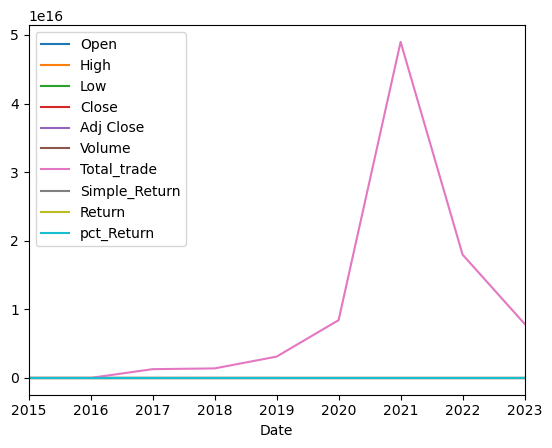

In [24]:
#yearly Adj Close 

yealry_df.plot()

In [19]:
#Getting The Cummulative Return 

df['Cummulative']=(1+df['Simple_Return']).cumprod()

df.head()

,Open,High,Low,Close,Adj Close,Volume,Total_trade,Simple_Return,Return,pct_Return,Cummulative
Date,,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2.575192e+09,NaN,NaN,NaN,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2.468865e+09,0.002492,NaN,NaN,1.002492
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,1.040705e+10,-0.107767,NaN,NaN,0.894456
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,1.563990e+10,-0.060079,NaN,NaN,0.840719
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,1.165384e+10,0.038907,NaN,NaN,0.873428


While percentage_change are only return daily differences in prices, cummulative return If cumulative return is above one, you are making profits else you are in loss.

<AxesSubplot:title={'center':'Cummaltive'}, xlabel='Date'>

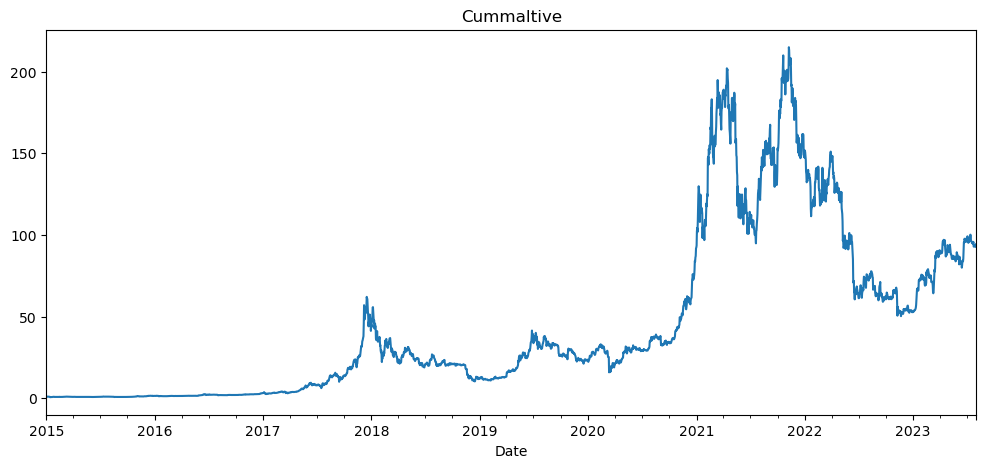

In [20]:
#creating a cummulative table.

df['Cummulative'].plot(title='Cummaltive',figsize=(12,5))

While Simple_return are only return daily differences in prices, cummulative return If cumulative return is above one, you are making profits else you are in loss. 2021 was a Great Years fo Investors 


In November 2021, Bitcoin experienced significant price movements. The month started with Bitcoin trading around  61,000𝑈𝑆𝐷,𝑟𝑒𝑎𝑐ℎ𝑖𝑛𝑔𝑎𝑛𝑎𝑙𝑙−𝑡𝑖𝑚𝑒ℎ𝑖𝑔ℎ𝑜𝑓𝑎𝑟𝑜𝑢𝑛𝑑
 67,000 USD on November 10th. However, the market then entered a period of correction, and Bitcoin's price started to decline.

It's worth noting that cryptocurrency prices are highly volatile, and the information provided here may not reflect the current state of the market. To get the most up-to-date information about Bitcoin-USD in November 2021, I recommend checking reliable financial news websites or cryptocurrency tracking platforms.

SARIMA MODELLING.

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Total_trade,Simple_Return,Return,pct_Return,Cummulative
Date,,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,2.575192e+09,NaN,NaN,NaN,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,2.468865e+09,0.002492,NaN,NaN,1.002492
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,1.040705e+10,-0.107767,NaN,NaN,0.894456
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,1.563990e+10,-0.060079,NaN,NaN,0.840719
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,1.165384e+10,0.038907,NaN,NaN,0.873428


In [22]:
#first let frop the NAN.

df=df.dropna()

df.head()

,Open,High,Low,Close,Adj Close,Volume,Total_trade,Simple_Return,Return,pct_Return,Cummulative
Date,,,,,,,,,,,
2015-04-11,236.016006,239.537003,234.175003,236.552002,236.552002,16365200,3.862449e+09,0.002033,-0.029646,-0.247247,0.752753
2015-04-12,236.535004,237.727997,233.494995,236.153000,236.153000,12387900,2.930172e+09,-0.001687,-0.034273,-0.250384,0.751484
2015-04-13,235.949997,236.934998,221.996002,224.587006,224.587006,31181800,7.357346e+09,-0.048977,-0.048267,-0.200991,0.714679
2015-04-14,224.759003,224.975998,216.322998,219.158997,219.158997,31719000,7.129131e+09,-0.024169,-0.082602,-0.170465,0.697406
2015-04-15,219.072998,223.832993,218.649002,223.832993,223.832993,22562000,4.942725e+09,0.021327,-0.062421,-0.184502,0.712279


In [23]:
#creating a dataframe to used for SARIMA MODELLING

arima_df=df.loc[:,['Adj Close','Simple_Return']]

arima_df

,Adj Close,Simple_Return
Date,,
2015-04-11,236.552002,0.002033
2015-04-12,236.153000,-0.001687
2015-04-13,224.587006,-0.048977
2015-04-14,219.158997,-0.024169
2015-04-15,223.832993,0.021327
...,...,...
2023-07-29,29356.917969,0.001285
2023-07-30,29275.308594,-0.002780
2023-07-31,29230.111328,-0.001544


<AxesSubplot:xlabel='Date'>

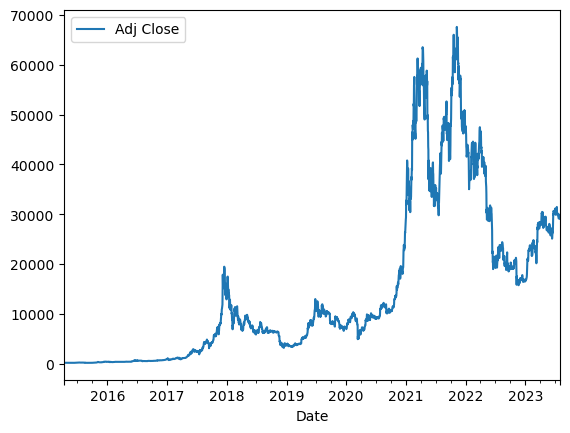

In [25]:
#plotting to see Trend of the Adjustment close column


arima_df.loc[:,['Adj Close']].plot()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

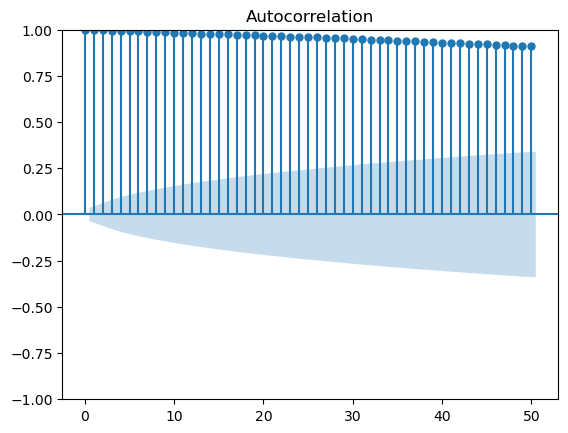

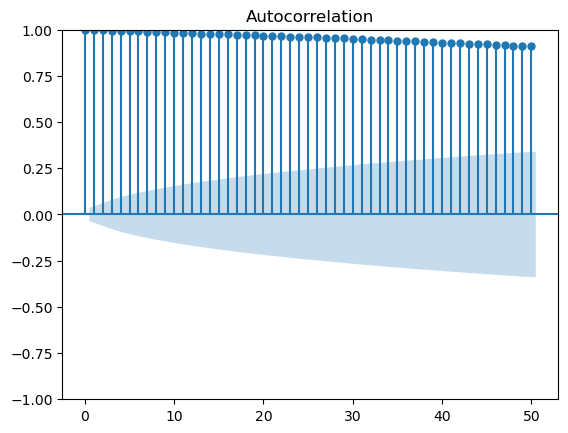

In [27]:
plot_acf(arima_df['Adj Close'],lags=50)

Stationary means that certain attributes of the data do not change over time. However, some time series are non-stationary, whereby values and associations between and among variables do vary with time. In finance, many processes are non-stationary, and so must be handled appropriate.

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


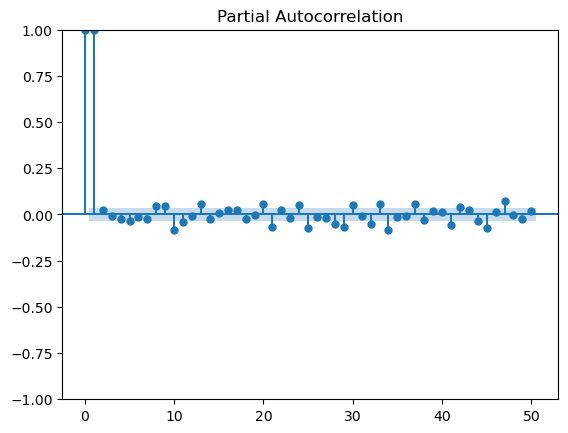

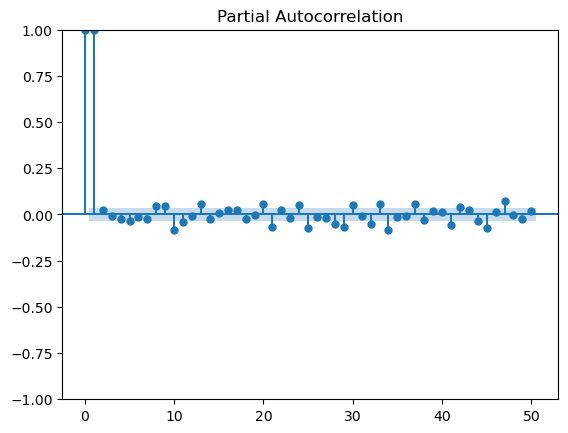

In [28]:
#using The partial autocorrelation to check the stationary Status?

plot_pacf(arima_df['Adj Close'],lags=50)

Adj close is Statinary

In [29]:
arima_df

,Adj Close,Simple_Return
Date,,
2015-04-11,236.552002,0.002033
2015-04-12,236.153000,-0.001687
2015-04-13,224.587006,-0.048977
2015-04-14,219.158997,-0.024169
2015-04-15,223.832993,0.021327
...,...,...
2023-07-29,29356.917969,0.001285
2023-07-30,29275.308594,-0.002780
2023-07-31,29230.111328,-0.001544


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


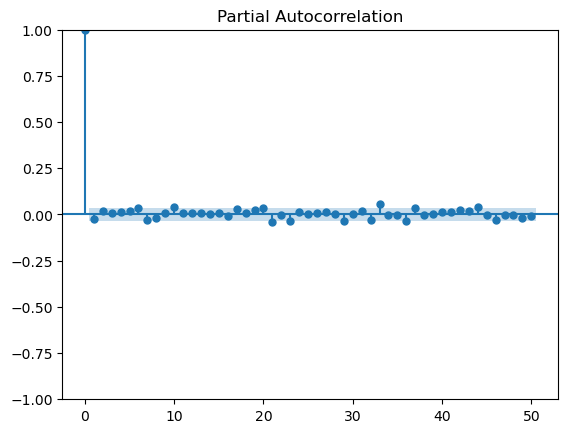

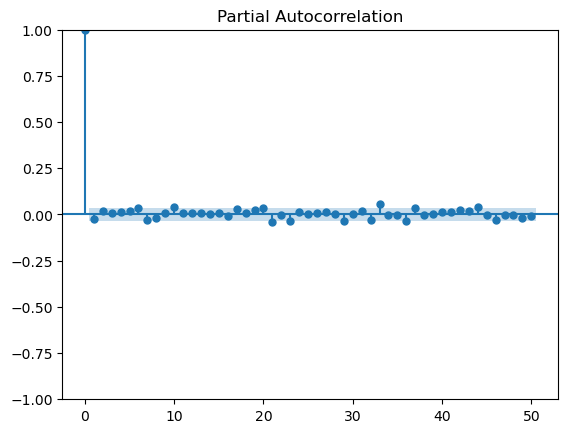

In [30]:
plot_pacf(arima_df['Simple_Return'].dropna(),lags=50)

Text(0.5, 1.0, 'Train and testing')

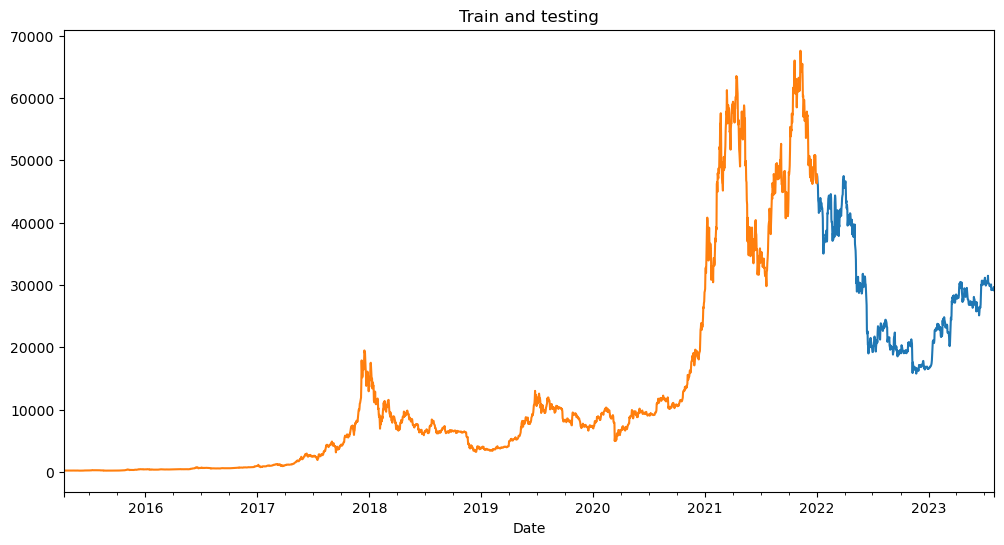

In [31]:
#spltting data for training and Testing

date_split='2022-01-01' #picking a Date

train=df['Adj Close'].loc[date_split:] #doe training
test=df['Adj Close'].loc[:date_split] #for testing

#for plotting 
train.plot(figsize=(12,6))
test.plot()
plt.title('Train and testing')

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#importing the SARIMA model

In [33]:
#creating a instance for the model, fittinfg in the necessary parameter.

models= SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
models_fit = models.fit(disp=False) 

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [40]:
#importing the Evalyuation library and math library

from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [41]:
#dropping the Na()

test=test.dropna()

In [42]:
fcast_len = len(test) #the lenght of test data

fcast = models_fit.forecast(fcast_len) 

mae = mean_absolute_error(test, fcast)
mse = mean_squared_error(test, fcast)
rmse = np.sqrt(mse)

In [43]:
#creating a function 

def rolling_forecast(train, test, order, season):
    '''creating a function so as iterate through
    better order selection and perfect seasona_order'''
    history = [x for x in train]
    model = SARIMAX(history, order= order, seasonal_order= season)
    model_fit = model.fit(disp=False)
    predictions = []
    results = {}
    yhat = model_fit.forecast()[0]

    predictions.append(yhat)
    history.append(test[0])
    for i in range(1, len(test)):
        model = SARIMAX(history, order= order, seasonal_order= season)
        model_fit = model.fit(disp=False)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        obs = test[i]
        history.append(obs)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    rmse = math.sqrt(mse)
    predictions = pd.Series(predictions, index=test.index)
    results['predictions'] = predictions
    results['mse'] = mse
    results['rmse'] = rmse
    results['mae'] = mae
    return results

In [44]:
forecast_rolling =rolling_forecast(train, test, (1, 1, 1), (1, 0, 0, 12))

forecast_rolling

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'predictions': Date
 2015-04-11    29157.530704
 2015-04-12      754.898510
 2015-04-13      253.198497
 2015-04-14      575.789526
 2015-04-15      522.395996
                   ...     
 2021-12-28    50692.148282
 2021-12-29    47687.148814
 2021-12-30    46434.611919
 2021-12-31    47175.098675
 2022-01-01    46309.917521
 Length: 2458, dtype: float64,
 'mse': 967421.7779795916,
 'rmse': 983.5760153539693,
 'mae': 355.9772836618754}

Mean Squared Error: 967421.7779795916
Root Mean Squared Error: 983.5760153539693
Mean Absolute Error: 355.9772836618754


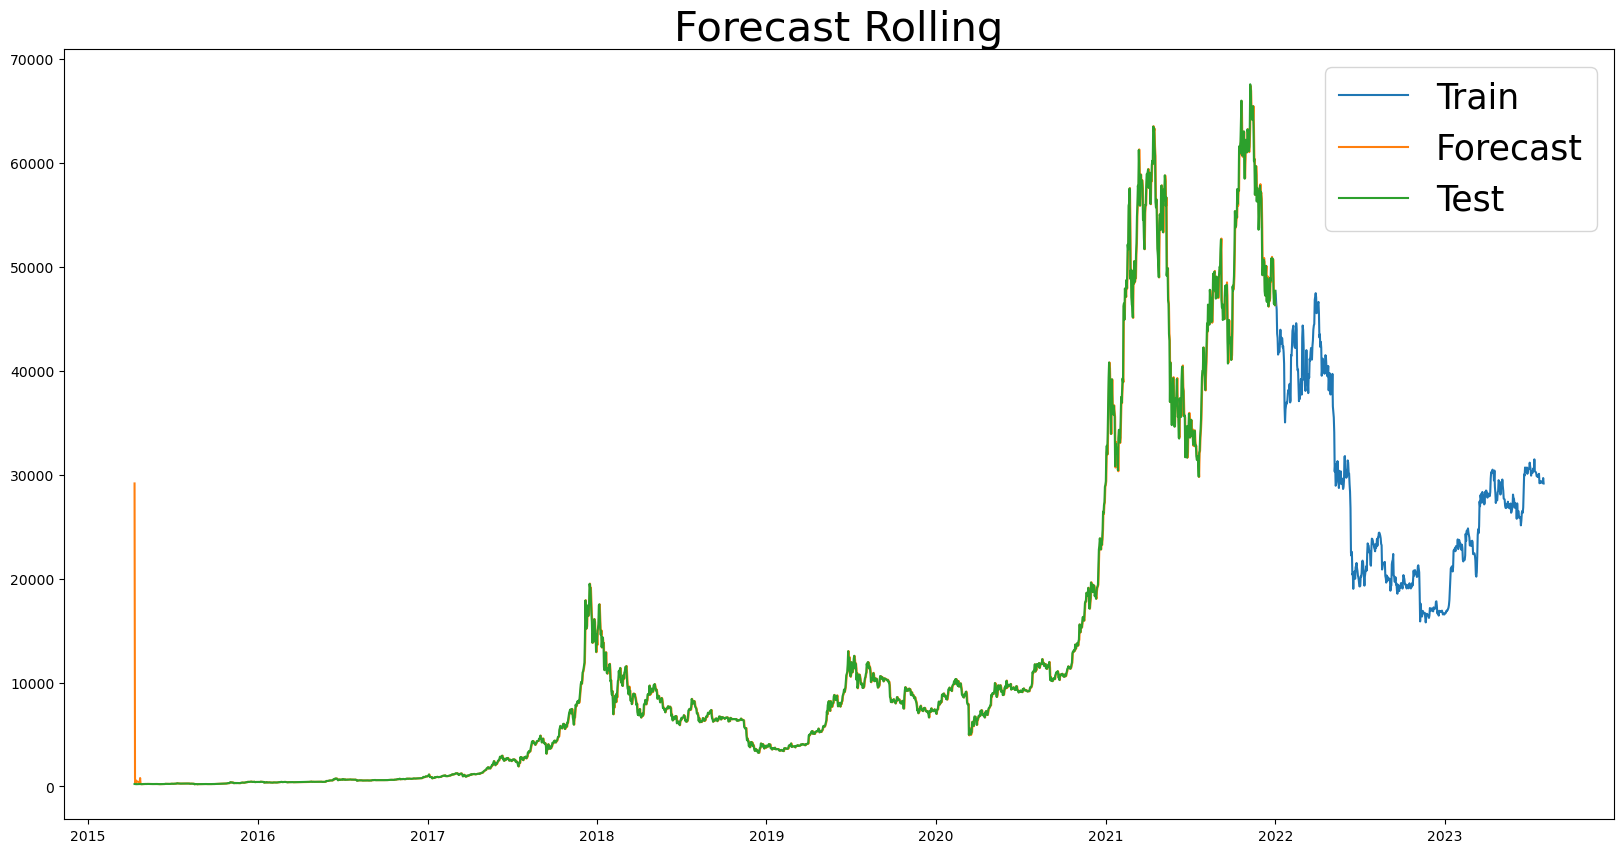

In [49]:
plt.figure(figsize=(20, 10),dpi=100)
plt.title('Forecast Rolling', fontsize=30)
plt.plot(train, label='Train')
plt.plot(forecast_rolling['predictions'],label='Forecast')
plt.plot(test, label='Test')

print(f'Mean Squared Error: {forecast_rolling["mse"]}')
print(f'Root Mean Squared Error: {forecast_rolling["rmse"]}')
print(f'Mean Absolute Error: {forecast_rolling["mae"]}')
plt.legend(fontsize=25)
plt.show()

Unfortunately our model is not fitting the trend very well. 
The problem with the finance forecast data is that it has an unstable trend. one top news can turn over change or decide the movement of the trend.

In [50]:
#Let confirm that with ADF

from statsmodels.tsa.stattools import adfuller

In [51]:
model=adfuller(arima_df['Adj Close'].dropna())
model

(-1.585737645804271,
 0.49075390285242626,
 29,
 3006,
 {'1%': -3.4325272764323667,
  '5%': -2.862501980355106,
  '10%': -2.567282087313508},
 48756.272331887056)

In [52]:
#creating a def function for the hypothesis testing


def Checking_hypothesis(X):
    model=adfuller(X)
    labels=['ADF_Testing','P_value','#no_of_lags','#no_of_Observation']
    for value,label in zip(model,labels):
        print(label+':'+str(value))
    if model[1]<0.05:
        print('we Reject The null Hypothesis, That is Stationary is Present')
    else:
        print(' We accept the null hypothesis, that is non_stationary is Present')

In [53]:
#checking if there is strong evidence agaist the null hypothesis?

Checking_hypothesis(arima_df['Adj Close'].dropna())

ADF_Testing:-1.585737645804271
P_value:0.49075390285242626
#no_of_lags:29
#no_of_Observation:3006
 We accept the null hypothesis, that is non_stationary is Present


In [70]:
#checking if there is strong evidence agaist the null hypothesis?

Checking_hypothesis(arima_df['Simple_Return'])

ADF_Testing:-56.33007803920535
P_value:0.0
#no_of_lags:0
#no_of_Observation:3035
we Reject The null Hypothesis, That is Stationary is Present


They Both Reject the Null Hypothesis but the no_of_Lags in Simple Return is 0 so definitely is not Valid,
while the number of Adj Close in Adj close is 29 which make it valid.

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


#importing the SARIMAX library

In [57]:
arima_df.index

#checking the Index

DatetimeIndex(['2015-04-11', '2015-04-12', '2015-04-13', '2015-04-14',
               '2015-04-15', '2015-04-16', '2015-04-17', '2015-04-18',
               '2015-04-19', '2015-04-20',
               ...
               '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
               '2023-07-28', '2023-07-29', '2023-07-30', '2023-07-31',
               '2023-08-01', '2023-08-02'],
              dtype='datetime64[ns]', name='Date', length=3036, freq=None)

In [58]:
#let split date that is we variable for train, and for test

split_date='2022-01-01'
train=arima_df['Adj Close'].loc[:split_date]
test=arima_df['Adj Close'].loc[split_date:]

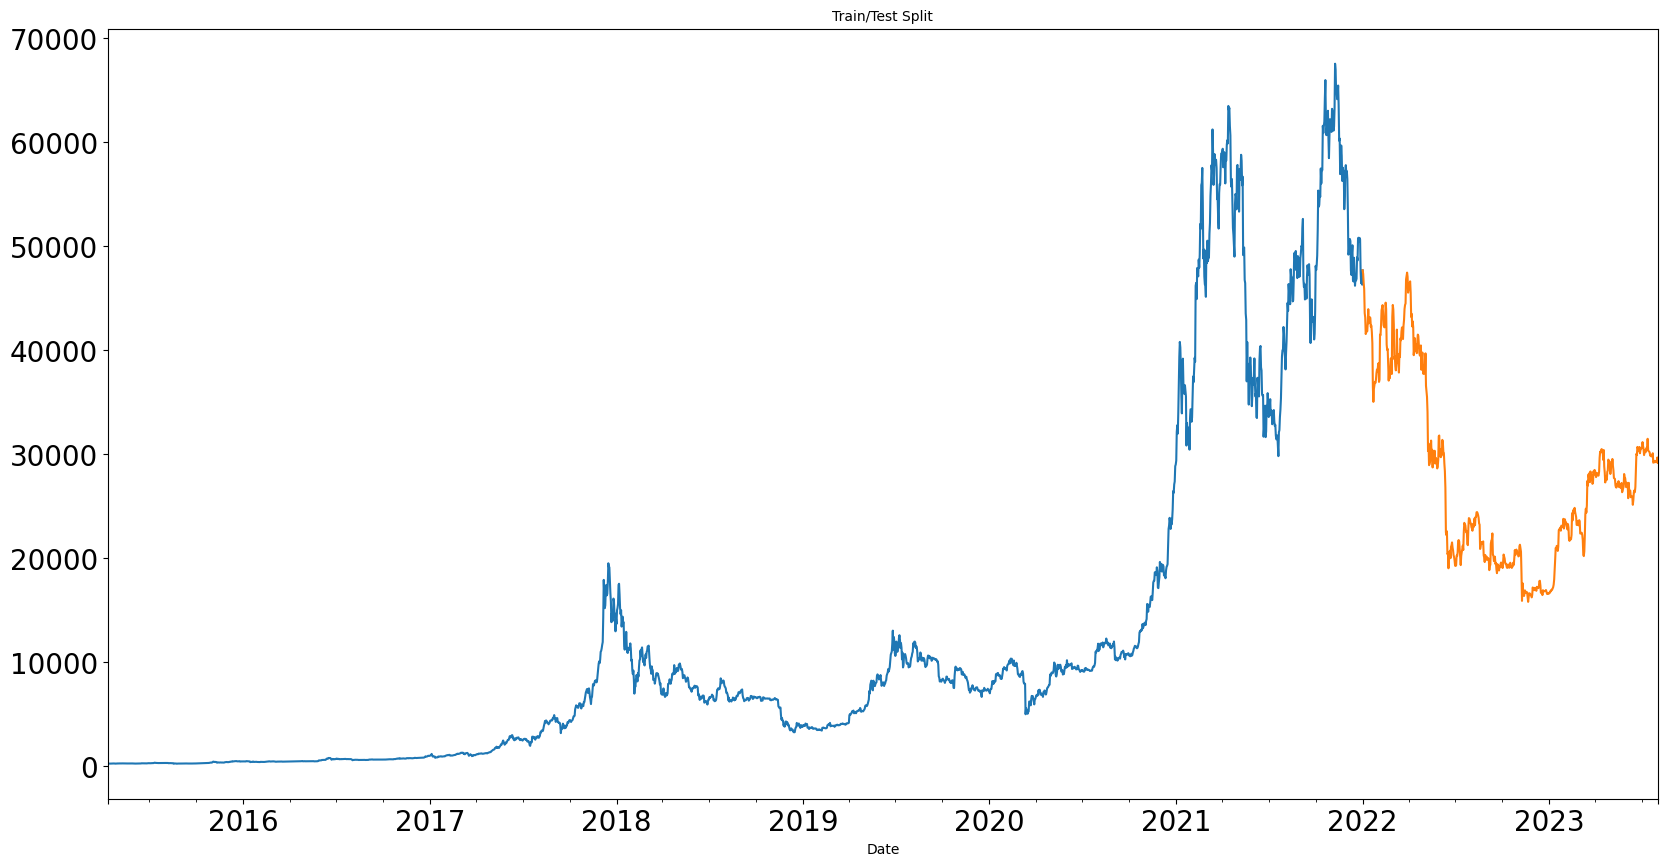

In [59]:
#let plot the our train and test.

train.plot(figsize=(20, 10),label='Train',fontsize=20)
test.plot(label='Test')
plt.title('Train/Test Split', fontsize=10)
plt.show()

In [60]:
#creating a instance for the model, fittinfg in the necessary parameter.

model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 0, 1, 12))
model_fit = model.fit(disp=False) 

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [61]:
#importing the Metrics  EValuation

from sklearn.metrics import mean_absolute_error,mean_squared_error

Mean Squared Error: 300879099.51271695
Root Mean Squared Error: 17345.866928831114
Mean Absolute Error: 15661.828852478035


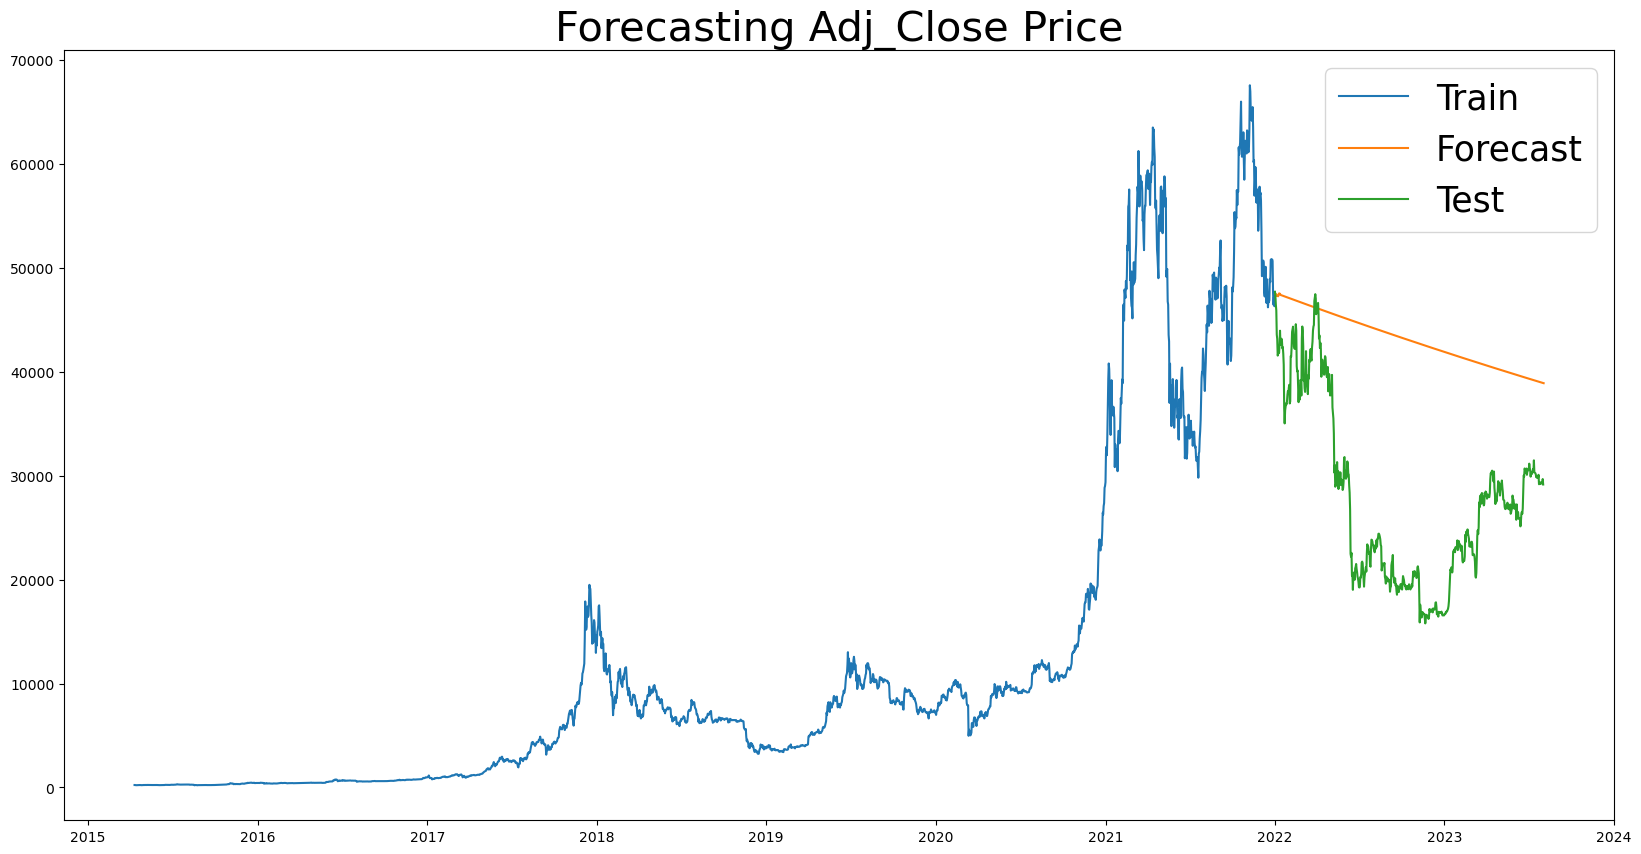

In [62]:
fcast_len = len(test)
fcast = model_fit.forecast(fcast_len)
mse = mean_squared_error(test, fcast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, fcast)
plt.figure(figsize=(20, 10))
plt.title('Forecasting Adj_Close Price', fontsize=30)
plt.plot(train, label='Train')
plt.plot(fcast, label='Forecast')
plt.plot(test, label='Test')

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
plt.legend(fontsize=25)
plt.show()

Waoh! the error rate is very very high,Unfortunately our model didn't fitting the trend very well, one of the major challenge   in cryptocurrency finance forecast data is that it has an unstable trend.
Instead, we'll use a rolling forecast. early deviations from the time series because of the trend won't hurt our ability to forecast future steps.

A rolling forecast will be Employ so as to properly forecast one step ahead and then refit our model on the new data.

In [67]:
#creating a Def function

def forecast_rollin(train, test, order, season):
    training = [x for x in train]
    model = SARIMAX(training, order= order, seasonal_order= season)
    model_fit = model.fit(disp=False)
    predictions = []
    results = {}
    y_predict = model_fit.forecast()[0]

    predictions.append(y_predict)
    training.append(test[0])
    for i in range(1, len(test)):
        model = SARIMAX(training, order= order, seasonal_order= season)
        model_fit = model.fit(disp=False)
        y_predict = model_fit.forecast()[0]
        predictions.append(y_predict)
        obs = test[i]
        training.append(obs)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mse)
    predictions = pd.Series(predictions, index=test.index)
    results['predictions'] = predictions
    results['mse'] = mse
    results['rmse'] = rmse
    results['mae'] = mae
    return results

In [68]:
forecast_rollin = forecast_rollin(train, test, (1, 1, 1), (1, 0, 0, 12))

In [65]:
forecast_rollin

{'predictions': Date
 2022-01-01    47513.274372
 2022-01-02    47711.037851
 2022-01-03    47171.809420
 2022-01-04    46458.757851
 2022-01-05    45935.390338
                   ...     
 2023-07-29    29321.828252
 2023-07-30    29371.557257
 2023-07-31    29274.673973
 2023-08-01    29237.345679
 2023-08-02    29658.942588
 Length: 579, dtype: float64,
 'mse': 787462.1490351126,
 'rmse': 887.3906406059918,
 'mae': 565.8058412580434}

Mean Squared Error: 787462.1490351126
Root Mean Squared Error: 887.3906406059918
Mean Absolute Error: 565.8058412580434


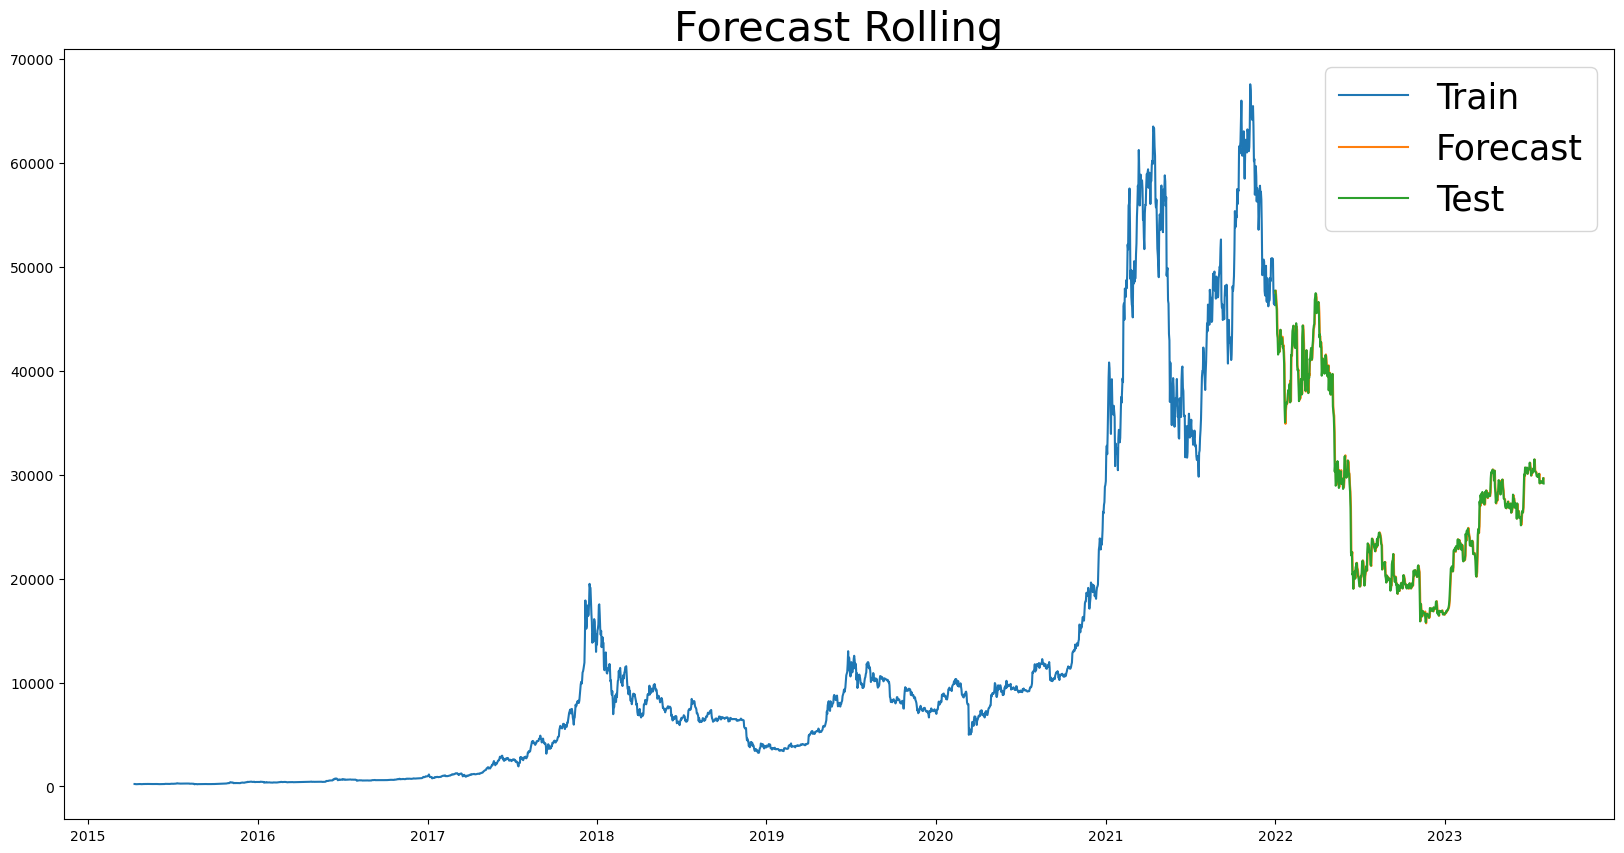

In [69]:
#plotting out the Train,test, and The Forecast values

plt.figure(figsize=(20, 10),dpi=100)
plt.title('Forecast Rolling', fontsize=30)
plt.plot(train, label='Train')
plt.plot(forecast_rollin['predictions'], label='Forecast')
plt.plot(test, label='Test')


#Also getting he Error Metrics,that is The Means Squared Error , the Root Means Squared Error and Mean Absolute error
print(f'Mean Squared Error: {forecast_rollin["mse"]}')
print(f'Root Mean Squared Error: {forecast_rollin["rmse"]}')
print(f'Mean Absolute Error: {forecast_rollin["mae"]}')
plt.legend(fontsize=25)
plt.show()

Yes!
our forecast perfectly fit in the test line, Rolling_forecasting is an expensive model  because all it do is to refit every timestep but it allows us to forecast where a bad step will add to the overal error without effecting future forecasts. This means that early deviations from the time series because of the trend won't hurt our ability to forecast future steps.

Please Note Even after the forecast success is not guaranteed.